## XGBoost
`XGBoost` (Extreme Gradient Boosting) is a powerful and efficient open-source machine learning library based on the gradient boosting framework. It is widely used for both regression and classification problems.

- Key Features:

  - Highly efficient and scalable implementation optimized for speed and performance.

  - Supports regularization (L1 and L2) to reduce overfitting.

  - Handles missing data internally.

  - Supports parallel and distributed computing.

  - Provides flexibility with various objective functions and evaluation metrics.

- Advantages:

  - Superior predictive accuracy for many machine learning tasks.

  - Effective handling of large datasets with high dimensionality.

  - Robustness against overfitting through shrinkage, tree pruning, and regularization.

Strong community support and integration with popular data science frameworks.

`XGBoost` is a go-to algorithm for many data science competitions and real-world applications due to its balance of accuracy, speed, and ease of use in predictive modeling.

In [4]:
# Import libraries for pipeline and preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load preprocessed dataset (update path if needed)
data = pd.read_csv('preprocessed_earthquake_data.csv')

# Define feature columns and target variable
# Keep categorical columns for encoding, numeric columns for scaling
target = 'Magnitude'
categorical_cols = ['Type', 'Magnitude Type', 'Source', 'Status']
numeric_cols = data.drop(columns=[target] + categorical_cols).columns.tolist()

X = data.drop(columns=[target])
y = data[target]

# Split dataset into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Preprocessing for numeric data: scaling
numeric_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the pipeline with preprocessing and XGBoost regressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse'))
])

In [8]:
# Train the pipeline
model_pipeline.fit(X_train, y_train)

c:\Users\win10\python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:57:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
# Predict on validation data
y_pred = model_pipeline.predict(X_val)

In [10]:
# Evaluate model performance
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [11]:
print(f'XGBoost Regression MAE: {mae:.4f}')
print(f'XGBoost Regression MSE: {mse:.4f}')
print(f'XGBoost Regression R² Score: {r2:.4f}')

XGBoost Regression MAE: 0.6844
XGBoost Regression MSE: 0.9010
XGBoost Regression R² Score: 0.1327


In [12]:
# Access the trained XGBoost model from the pipeline to get feature importances
# For feature names after transformation, get numeric + encoded categorical names
encoded_cat_features = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = numeric_cols + list(encoded_cat_features)

feature_importances = model_pipeline.named_steps['regressor'].feature_importances_
indices = np.argsort(feature_importances)[::-1]

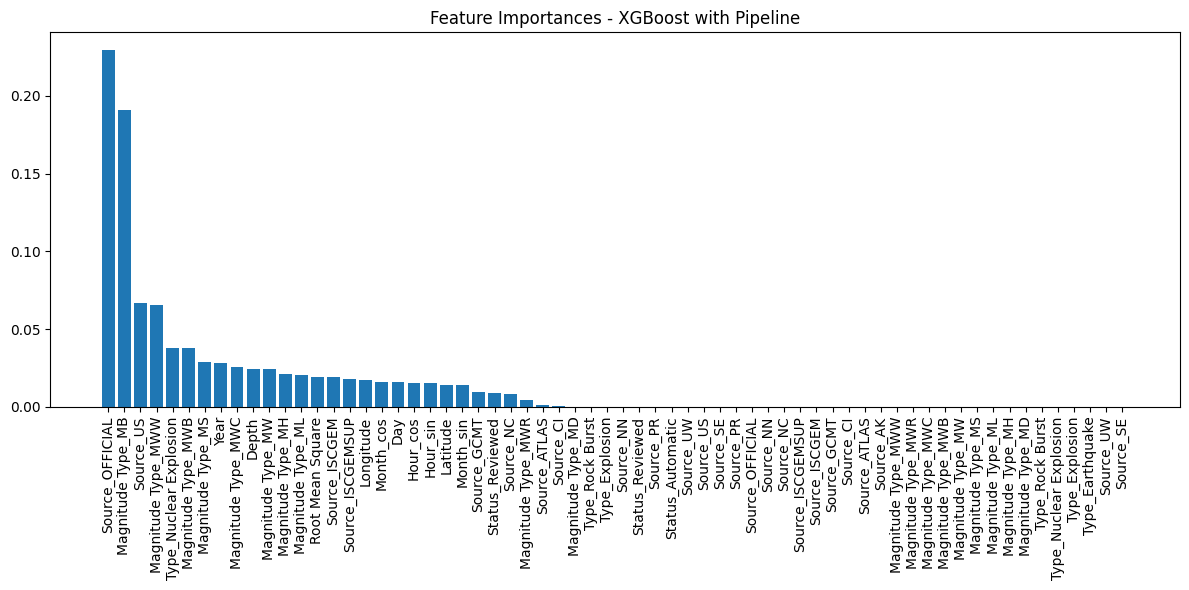

In [13]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances - XGBoost with Pipeline')
plt.bar(range(len(all_features)), feature_importances[indices], align='center')
plt.xticks(range(len(all_features)), np.array(all_features)[indices], rotation=90)
plt.tight_layout()
plt.show()
